# Blazars/Non-Blazars (AGNs) Samples Definition

### These notebook is to define the samples of sed data of blazars and non-blazar objects for future training of the neural network.

A list of ID and coordinates (RA, Dec) is obtained for the blazar dataset (5699 from the OU4v2 catalog) and for agns(???) (4097 from the mqv7.2 catalog).

This list will be given as input to the VOU_Blazar tool (Radius of 15 arcsec) to get the files with the sed data.

In [1]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
print(sns.__version__)

import pandas as pd
print(pd.__version__)

import numpy as np
print(np.__version__)

import os

0.11.2
1.4.1
1.18.5


In [2]:
blcatalog = 'OU4Bl_v2.csv'
agncatalog = 'milliquasv7.2.txt'
dir_path = '/home/elenagasparri/Documenti/Fisica/esame_cmepda/SED_Builder/Data/'

In [3]:
os.chdir(dir_path)
%ls

2whsp_nameNOTfound.txt          my2whsp_name.csv
3hsp.csv                        my3hsp_name.csv
agn_qrx_radec.csv               my3hsp_name_not_recognized.csv
agns_qrx_labelradec.csv         my3hsp_name_prova.csv
agns_quasR.csv                  mybl_list.csv
agns_quasR_prova.csv            new_milliquas.csv
agns_v72_qrx.csv                new_veron.csv
milliquasv6.4.csv               ou4bl3hsp_name.csv
milliquasv6.4_readme.txt        ou4bl3hsp_radec.csv
milliquasv7.2_readme.txt        ou4bl_labelradec.csv
milliquasv7.2.txt               OU4Bl_v1.csv
milliquasv7.4_agn_K.txt         OU4Bl_v2.csv
milliquasv7.4_agn_S1.txt        setAGnsNonBlazar.ipynb
milliquasv7.4_QSO_TYPE_1.txt    setBlazar.html
milliquasv7.4_Radio_galaxy.txt  setBlazar.ipynb
milliquasv7.4_readme.txt        veron_catalogue.txt
milliquasv7.4.txt


# Blazar sample

In [4]:
ou4bl = pd.read_csv(blcatalog, encoding='utf-8-sig')
ou4bl.sample(10)

,id,Source name,R.A.,Dec,Radio flux d.,Fermi flux,Log nu_peak,Redshift,Original catalog
5673,5674,5BZQJ2230-3942,22 30 40.27,-39 42 51.98,370.0,0.000000e+00,0.0,0.318,5BZCAT
2838,2839,5BZBJ1109+2411,11 09 16.17,+24 11 20.11,34.0,3.700000e-12,15.7,0.000,5BZCAT
5979,5980,5BZQJ2343+2339,23 43 12.39,+23 39 45.61,363.0,0.000000e+00,0.0,1.328,5BZCAT
3061,3062,5BZBJ1152+1531,11 52 22.18,+15 31 48.1,34.0,0.000000e+00,0.0,0.000,5BZCAT
3211,3212,5BZQJ1217+5155,12 17 36.65,+51 55 10.19,85.0,0.000000e+00,0.0,2.224,5BZCAT
3673,3674,5BZQJ1342-2051,13 42 04.73,-20 51 29.41,399.0,7.500000e-12,0.0,1.582,5BZCAT
1878,1879,4FGLJ0754.0+0451,07 54 05.7,+04 52 38.49,53.1,3.200000e-12,0.0,0.000,Fermi 4LAC
3947,3948,3HSPJ143005.0+412707.9,14 30 04.99,+41 27 07.88,31.7,0.000000e+00,16.6,0.663,3HSP
746,747,5BZQJ0239-7626,02 39 00.48,-76 26 42.21,367.0,0.000000e+00,0.0,1.386,5BZCAT
4525,4526,4FGLJ1627.3+4758,16 27 46.2,+48 03 24.91,97.8,2.500000e-12,0.0,0.000,Fermi 4LAC


In [5]:
# convert coordinates
def sex2deg(ra,dec):
    h,m,s = list(map(float,ra.split()))
    ra = s / 86400
    ra += m / 1440
    ra += h / 24
    ra *= 360
    
    d,m,s = dec.split()
    dec = float(s) / 3600
    dec += float(m) / 60
    if d[0] == '-':
        dec = float(d) - dec
    else:
        dec = float(d) + dec
    
    return ra,dec

In [6]:
RA_COL = 'R.A.'
DEC_COL = 'Dec'
def apply_df(df):
    try:
        bla = list(sex2deg(df[RA_COL],df[DEC_COL]))
    except:
        bla = [None,None]
    return bla

ou4bl[['RA','DEC']] = ou4bl.apply(apply_df, axis=1, result_type = 'expand')

In [7]:
ou4bl.head()

,id,Source name,R.A.,Dec,Radio flux d.,Fermi flux,Log nu_peak,Redshift,Original catalog,RA,DEC
0,1,3HSPJ000236.0-081532.4,00 02 36.06,-08 15 32.4,29.0,0.000000e+00,16.0,0.390,3HSP,0.650250,-8.259000
1,2,5BZBJ0002-0024,00 02 57.16,-00 24 47.01,178.0,0.000000e+00,0.0,0.523,5BZCAT,0.738167,-0.413058
2,3,4FGLJ0003.3-5905,00 03 13.32,-59 05 47.61,505.9,1.680000e-12,0.0,0.000,Fermi 4LAC,0.805500,-59.096558
3,4,4FGLJ0003.3-1928,00 03 18.66,-19 27 22.28,171.0,2.590000e-12,0.0,0.000,Fermi 4LAC,0.827750,-19.456189
4,5,5BZQJ0003+2129,00 03 19.32,+21 29 44.48,83.0,0.000000e+00,0.0,0.450,5BZCAT,0.830500,21.495689


In [8]:
ou4bl.columns

Index(['id', 'Source name', 'R.A.', 'Dec', 'Radio flux d.', 'Fermi flux',
       'Log nu_peak', 'Redshift', 'Original catalog', 'RA', 'DEC'],
      dtype='object')

In [9]:
# Description of the Blazars in the catalog
ou4bl.groupby('Original catalog').size().sort_values(ascending=False)

Original catalog
5BZCAT        3561
3HSP          1353
Fermi 4LAC     748
Fermi 3LAC     415
dtype: int64

In [10]:
# define the colums of interest
col = dict(idn='id',
           ra='RA',
           dec='DEC',
           name='Source name',
           redshift='Redshift',
           flux_radio='Radio flux d.',
           fermi_flux='Fermi flux',
           nupk='Log nu_peak',
           catalog='Original catalog'
          )

In [ ]:
# Dataset per il run con VOU_Blazars in batch mode (6077 Blazars)

#ou4bl[[col['idn'],col['ra'],col['dec']]].to_csv('ou4bl_labelradec.csv', sep= ' ', encoding='utf-8-sig', index=False, float_format='%.5f')

# AGNs Sample

In [11]:
agns_v72 = pd.read_csv(agncatalog, encoding='utf-8-sig', delimiter = '|')
agns_v72.sample(10)

,RAJ2000,DEJ2000,Name,Type,Rmag,Bmag,Comment,R,B,z,Qpct,XName,RName,Lobe1,Lobe2
930836,197.072332,-30.595489,WISEA J130817.35-303543.8,q,18.91,20.24,jG,-,-,1.000,96,,,,NaN
1243330,248.851835,44.344365,WISEA J163524.44+442039.7,q,17.98,20.35,pmG,1,-,0.200,68,,,,NaN
1305198,268.461370,35.466229,B2 1752+35,QRX,18.42,18.87,pG,-,-,0.550,98,2RXS J175350.0+352757,VL0J175350.76+352758.8,NVSS J175350.6+352758,NaN
1318291,277.178791,24.496719,WISEA J182842.90+242948.4,q,19.07,19.58,pG,1,-,2.200,99,,,,NaN
906886,193.400006,26.047333,WISEA J125336.00+260250.3,q,20.12,20.42,pm,1,-,0.400,98,,,,NaN
133488,20.959819,0.155480,SDSS J012350.35+000919.7,Q,22.63,22.60,g,-,-,2.295,,,,,NaN
812398,179.058212,52.656735,SDSS J115613.97+523924.2,Q,22.19,21.86,g,-,-,2.166,,,,,NaN
1504165,348.018891,19.704208,SDSS J231204.53+194215.1,Q,20.76,21.60,g,1,-,1.395,,,,,NaN
891465,191.037726,52.235298,SDSS J124409.05+521407.1,Q,20.45,21.18,jG,-,-,0.965,,,,,NaN
1192446,238.891596,59.689652,SDSS J155533.97+594122.7,Q,19.98,21.45,jG,-,1,1.719,,,,,NaN


In [12]:
agns_v72.columns

Index(['RAJ2000', 'DEJ2000', 'Name', 'Type', 'Rmag', 'Bmag', 'Comment', 'R',
       'B', 'z', 'Qpct', 'XName', 'RName', 'Lobe1', 'Lobe2'],
      dtype='object')

In [13]:
agns_v72.groupby('Type').size().sort_values(ascending=False)

Type
Q       707379
q       478297
X        83737
R        52371
QX       50952
qX       46025
qR       29917
N        25773
QR       24446
A        24114
AX        8100
K         4522
AR        4421
NR        4117
QRX       4093
2         3928
QR2       2150
qRX       2100
RX        1870
NX        1843
ARX       1831
R2        1786
qR2       1785
BRX       1658
q2         972
QR2X       877
BR         781
Q2         715
NRX        635
KX         524
qR2X       248
KR         174
NR2        165
Q2X        164
AR2X       150
AR2        145
R2X        142
N2         133
BX         106
2X          90
A2          87
q2X         80
BR2X        68
B           51
L           50
KRX         49
NR2X        43
A2X         42
BR2         27
KR2         18
K2          18
N2X         17
LX          10
B2X          8
KR2X         6
K2X          5
B2           5
LRX          3
LR           1
dtype: int64

In [16]:
# seleziono il tipo "QRX" cioè QSO type-I broad-line core-dominated con associazione Radio e X (4093)
agns_qrx = agns_v72.loc[agns_v72['Type'].str.strip() == 'QRX']
agns_qrx.head()

,RAJ2000,DEJ2000,Name,Type,Rmag,Bmag,Comment,R,B,z,Qpct,XName,RName,Lobe1,Lobe2
1343,0.212906,11.236500,SDSS J000051.09+111411.2,QRX,17.16,17.99,pG,-,-,0.865,99,2RXS J000051.2+111422,FIRST J000051.0+111411,VL0J000051.07+111411.6,NaN
1520,0.240825,29.710146,SDSS J000057.79+294236.4,QRX,20.10,20.11,gG,-,-,0.760,100,2RXS J000058.1+294227,VL0J000057.78+294236.5,NVSS J000058.1+294237,2RXP J000058.5+294234
1787,0.285889,19.242694,TEX 2358+189,QRX,20.50,21.19,j,1,1,3.100,100,2SXPS J000108.5+191431,VL0J000108.62+191434.1,NVSS J000108.6+191434,NaN
2071,0.330319,19.429377,SDSS J000119.28+192545.7,QRX,19.97,20.61,gG,-,1,1.253,98,2SXPS J000119.2+192541,NVSS J000119.2+192548,,NaN
2227,0.353409,8.890468,SDSS J000124.81+085325.7,QRX,19.13,18.93,jG,-,-,1.051,99,2RXS J000124.9+085320,FIRST J000124.8+085325,NVSS J000124.8+085325,NaN


In [18]:
# Dataset agns per run VOU_Blazars

agns_qrx_labradec = agns_qrx[['RAJ2000','DEJ2000']]
#agns_qrx_labradec.to_csv('agns_qrx_labelradec.csv', sep= ' ')
agns_qrx.shape

(4093, 15)

# Preprocessing of the SED data file obteined with VOU_Blazars

At this point, the SED of each object (providing one) is built from `VOU-Blazars Tool`, in particular the SEDs go inside `~/Vou_Blazars/Results/SEDtool/`.

In [19]:
#funzione per creare una lista con i nomi dei file da analizzare

import os
def list_files_recursive(path):
    """
    Function that receives as a parameter a directory path
    :return list_: File List and Its Absolute Paths
    """
    files = []
    # r = root, d = directories, f = files
    for r, d, f in os.walk(path):
          for file in f:
                if '.zip' in file:
                    continue
                files.append(os.path.join(r, file))
                
    return files

In [21]:
# Load SED data of the Blazars from my run of VOUB in /VOUB_blazarE
dir_bzcat = 'VOUB_blazarE/'
#dir_agn = 'VOUB_AGNCarlos/'

print(os.getcwd())

/home/elenagasparri/Documenti/Fisica/esame_cmepda/SED_Builder/Data


In [22]:
cd /home/elenagasparri/Documenti/Fisica/esame_cmepda/SED_Builder

/home/elenagasparri/Documenti/Fisica/esame_cmepda/SED_Builder


In [23]:
cur_dir = os.getcwd()
%ls

 5BZCAT.csv*
 agn_name.csv
 agns/
 AGNs.csv
 agns_mqv7.2_name/
 agns_mqv7.2_radec_qrx/
 bzcat_catalougue_ssdc.csv
 bzcat_name.csv
 carlos_AGNSample_AllColumns_clean.csv
 Check_run_VOUB.ipynb
 Data/
 geckodriver.log
 newfile.txt
 nn_data_v2.npz
 nn_data_v3.npz
 nn_data_voub.npz
 preparationSED_BUILDERdata.ipynb
 preparation_sedData_BinningHist.ipynb
 preparation_sedData_final_version.ipynb
 preparation_sedData_final_version-v2.ipynb
 preparation_sedData_final_version-v3-Copy1.ipynb
 preparation_sedData_final_version-v3.ipynb
 preparation_sedData.ipynb
 preparationVOUBdata.ipynb
 __pycache__/
 result_bzcat.txt
 run_sedbuilder_batch.sh*
 run_sedbuilder.py
 run_sedbuilder_selenium_command.py
 run_sedbuilder_selenium_final.py
 sedData_2whsp_name/
 sedData_bzcat_name/
'SED with no data'/
 VOUB_AGNCarlos/
 VOUB_BlazarCarlos/
 VOUB_blazarE/


In [24]:
# List of sed file for agn and blazar from VOUB

path_bzcat = os.path.join(cur_dir, dir_bzcat)
sed_bzcat = list_files_recursive(path_bzcat)
#path_agn = os.path.join(cur_dir, dir_agn)
#sed_agn_c = list_files_recursive(path_agn)

In [25]:
# Number of sed of blazars finally found
len(sed_bzcat)

5699

In [ ]:
# Number of sed of agns finally found
len(sed_agn_c)

### Preprocessing sui file delle sed del Blazar Sample per preparare input rete neurale

In [27]:
# Blazars

freq_all_bl=[]                                  # inizializzazione array che conterrà tutte le frequenze del dataset
flux_all_bl=[]                                  # inizializzazione array che conterrà tutti i flussi del dataset
seddata_all_bl= []                              # inizializzazione tupla per il dataset completo rete neurale
point_sed_bl =[]                                # inizializzazione array con numero di punti sed per sorgente

for file in sed_bzcat:
    df_sed = pd.read_csv(file, sep='|', names=['ra','dec','freq','dfreq','flux','dflux','mjd','dmjd','UL','UNK'])
    ul_idx = df_sed[(df_sed.UL=='UL')].index    # trovo eventuali upper limit nel file
    df_sed.drop(ul_idx,inplace=True)            # elimino upper limit
    
    freq_opt = []                               # np array fequenza flusso che non contengono upper limit
    flux_opt = []                               # e misure ripetute
    
    sed_data= df_sed[['freq','flux']].to_numpy()
    freq=sed_data[:,0]
    flux=sed_data[:,1]
    try:
        #tolgo eventuali punti molto alti in flusso
        strange_flux_index = [i for i in range(len(freq)) if flux[i]>= 1e-5 or flux[i]<0]
        freq = np.delete(freq,strange_flux_index)
        flux = np.delete(flux,strange_flux_index)
        # se le frequenze sono ripetute, tengo la misura a flusso più alto
        for i in range(len(freq)):
            if np.size(np.where(freq_opt == freq[i]))>0:
                if flux[i] > flux_opt[np.where(freq_opt == freq[i])]:
                    flux_opt[np.where(freq_opt == freq[i])]=flux[i]
            else:
                freq_opt= np.append(freq_opt,freq[i])
                flux_opt= np.append(flux_opt,flux[i])
    except TypeError:
        freq_opt= np.append(freq_opt,freq)                       # Nel caso ci sia una misura sola di flusso
        flux_opt= np.append(flux_opt,flux)                       # non da errore ma appende semplicemente valore
    
    # Costruisco array di interesse
    freq_all_bl = np.append(freq_all_bl,freq_opt)                   # array 1-D con tutte le frequenze
    flux_all_bl = np.append(flux_all_bl,flux_opt)                   # array 1-D con tutti i flussi
    freq_points_bl = np.unique(freq_all_bl)                         # array 1-D con solo le frequenze diverse presenti nel set blazars
    freq_points_bl_ord = freq_points_bl[freq_points_bl.argsort()]   # array freq_points ordinato
    seddata_all_bl.append((freq_opt,flux_opt))                      # tupla flux_all[i][j][k], i = source, j=0 or 1 freq or
                                                                    # flux measure, [k] = k-riga dell'array
    point_sed_bl = np.append(point_sed_bl,len(freq_opt))            # array con numero di punti per sed

### Preprocessing sui file delle sed degli AGNs per preparare input rete neurale

In [ ]:
# Dataset AGNs


freq_all_agn=[]
flux_all_bl=[]
seddata_all_agn= []
point_sed_agn =[]

for file in sed_agn_c:
    df_sed = pd.read_csv(file, sep='|', names=['ra','dec','freq','dfreq','flux','dflux','mjd','dmjd','UL','UNK'])
    ul_idx = df_sed[(df_sed.UL=='UL')].index    # trovo eventuali upper limit nel file
    df_sed.drop(ul_idx,inplace=True)            # elimino upper limit
    
    freq_opt = []
    flux_opt = []
    
    sed_data= df_sed[['freq','flux']].to_numpy()
    freq=sed_data[:,0]
    flux=sed_data[:,1]
    try:
        #tolgo eventuali punti molto alti in flusso
        strange_flux_index = [i for i in range(len(freq)) if flux[i]>= 1e-5 or flux[i]<0]
        freq = np.delete(freq,strange_flux_index)
        flux = np.delete(flux,strange_flux_index)
        # se le frequenze sono ripetute, tengo la misura a flusso più alto
        for i in range(len(freq)):
            if np.size(np.where(freq_opt == freq[i]))>0:
                if flux[i] > flux_opt[np.where(freq_opt == freq[i])]:
                    flux_opt[np.where(freq_opt == freq[i])]=flux[i]
            else:
                freq_opt= np.append(freq_opt,freq[i])
                flux_opt= np.append(flux_opt,flux[i])
    except TypeError:
        freq_opt= np.append(freq_opt,freq)                       # Nel caso ci sia una misura sola di flusso
        flux_opt= np.append(flux_opt,flux)                       # non da errore ma appende semplicemente valore
    
    # Costruisco array di interesse
    freq_all_agn = np.append(freq_all_agn,freq_opt)                    # array 1-D con tutte le frequenze
    flux_all_agn = np.append(flux_all_agn,flux_opt)                   # array 1-D con tutti i flussi
    freq_points_agn = np.unique(freq_all_agn)                          # array 1-D con solo le frequenze diverse presenti nel set agns
    freq_points_agn_ord = freq_points_agn[freq_points_agn.argsort()]   # array freq_points ordinato
    seddata_all_agn.append((freq_opt,flux_opt))                        # tupla seddata_all_agn[i][j][k], [i] = source, j=0 or 1 freq or
                                                                       # flux measure, [k] = k-riga dell'array
    point_sed_agn = np.append(point_sed_agn,len(freq_opt))             # array con numero di punti per sed

In [28]:
freq_points_bl.shape

(5603,)

In [29]:
len(seddata_all_bl)

5699

In [ ]:
freq_points_agn.shape

In [ ]:
len(seddata_all_agn)

# Generation of the dataset for the Neural Network

In [30]:
# Genero 'nn_freq_data' un vettore ordinato che contenga tutti i valori di frequenze diverse che compaiono nei due
# data set blazars e agns per creare gli array di lunghezza identica da dare in pasto alla rete neurale

#tot_freq = np.append(freq_points_bl_ord,freq_points_agn_ord)
#tot_freq_un = np.unique(tot_freq)
#nn_freq_data = tot_freq_un[tot_freq_un.argsort()]

#nn_freq_data.shape

#uso freq_points_bl_ord finche non ho dataset agn
nn_freq_data = freq_points_bl_ord
nn_freq_data.shape

(5603,)

In [31]:
def GenerateDataSet(nn_frequencies, sed_values):
    """
    Una funzione che dato un array di frequenze ordinato, genera una array con shape (N,2) dove i valori di flusso
    sono disposti nella giusta posizione rispetto alla frequenza associata (assegna zero ai flussi non misurati).
    Nella seconda colonna abbiamo un flag a 1 per dati presenti nel file della sed.
    
    nn_frequencies = numpy array ordinato con tutte le frequenze diverse presenti nei data set blazar + agns
    sed_values = tupla che contiene tutti i dati sed (blazars o agn) [i]= sources, [j]= 0 (freq), 1(flux), [k]=k-riga dell'array
    
    """
    data = []
    for x in sed_values:
        temp = np.zeros((nn_frequencies.shape[0],2)) #np.zeros(freq_points.shape)
        for i in range(len(x[0])):
            idx = np.where(nn_frequencies == x[0][i])
            temp[idx,0] = x[1][i]                 # temp[idx] = x[1][i]
            temp[idx,1]=1                        # flag a 1 per presenza dati nella sed
        data.append(temp)
    return np.array(data)

In [32]:
# n-D array di numpy con i dati delle blazars per la rete neurale
bl_data = GenerateDataSet(nn_freq_data, seddata_all_bl)

bl_data.shape

(5699, 5603, 2)

In [ ]:
# n-D array di numpy con i dati degli AGN non-blazazar per la rete neurale
agn_data = GenerateDataSet(nn_freq_data, seddata_all_agn)

agn_data.shape

In [ ]:
# Salvo i due numpy.ndarray dei dati blazar e agn e l'array con le frequenze ordinate, nel file '.npz'
# che userò nella rete neurale
#np.savez('nn_data_voub.npz',bl_data = bl_data, agn_data = agn_data, nn_freq_data = nn_freq_data)

# Some Plot of data

In [33]:
# Histogram of the number of sources per amount of data points in the SED
#plt.style.use('seaborn-white')
def histData(points_bl, points_agn):
    ''' Histogram of the amount of data points per SED file
    -----------
        points_bl = numpy array like points_per_sed of Blazars sources
        points_agn = numpy array like points_per_sed of AGN sources
    '''
    plt.figure()
    plt.title('Number of sources per amount of data points in the SED')
    plt.xlabel('Points per SED')
    plt.ylabel('Numbers of sources')
    plt.grid(True)
    bins = np.logspace(0, 3, 50)
    plt.xscale('log')

    n, bins, patches=plt.hist(points_bl, bins=bins, alpha=1.0, histtype='step', label='Blazars')
    n_1, bins_1, patches_1=plt.hist(points_agn, bins=bins, alpha=1.0, histtype='step', label=f'AGNs')
    plt.legend(loc='upper right')
    plt.show()

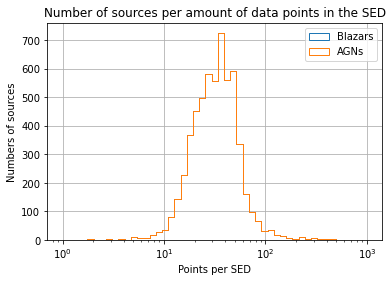

In [34]:
#plot of VOUB data
#histData(point_sed_bl,point_sed_agn)
histData(point_sed_bl,point_sed_bl)

In [35]:
# plotto le SED sovraposte di tutti i file per vedere come sono distribuiti i punti
def sedDistribution(sed_data_all,mode):
    ''' Plot of the SED files
    -------------
        sed_data_all = tupla con i dati completi freq e flux like seddata_all_***
        mode = boolean , 'True' stands for blazar and 'False' for AGNs
    '''
    plt.figure()
    if mode:
        plt.title('Superimposed Plot of the SED of the entire Blazars dataset')
    else:
        plt.title('Superimposed Plot of the SED of the entire AGNs dataset')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel(r'$\nu F_{\nu} (erg/cm^2/s)$')
    plt.grid(True)
    for sed in sed_data_all:
        freq= sed[0]
        flux= sed[1]
        plt.loglog(freq, flux, 'b.', markersize=1)
    plt.show()

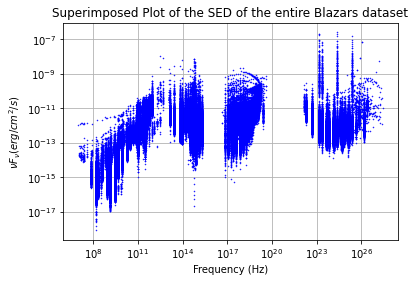

In [36]:
sedDistribution(seddata_all_bl,True)

In [ ]:
sedDistribution(seddata_all_agn,False)

In [37]:
#Scatter plot of the SED files with color map for the recurrent point

def sedColormapPlot(sed_data_all,mode):
    ''' Scatter plot of the SED files with color map for the recurrent point
    -------------
        sed_data_all = tupla con i dati completi freq e flux like seddata_all_***
        mode = boolean , 'True' stands for blazar and 'False' for AGNs
    '''
    dens = np.zeros((1,3))
    for sed in sed_data_all:
        freq= sed[0]
        flux= sed[1]
        # Con l'ndarray dens conto quante volte in totale ho una stessa misura di freq/flusso
        # La terza colonna dell'array ci dice il numero di volte che è ripetuta la misura nell'intero dataset
        for i in range(len(freq)):
            if np.size(np.where(np.logical_and(dens[:,0] == freq[i], dens[:,1] == flux[i]))[0]) > 0:
                dens[np.where(np.logical_and(dens[:,0] == freq[i], dens[:,1] == flux[i]))[0],2] += 1
            else:
                dens = np.vstack([dens,[freq[i],flux[i],1]])
    densn = np.delete(dens,(0),axis=0)                              #tolgo la prima riga di zeri
    
    plt.figure()
    fig,ax = plt.subplots()
    if mode:
        fig.suptitle('Density plots of the SEDs of Blazars data set')
    else:
        fig.suptitle('Density plots of the SEDs of AGNs data set')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel(r'$\nu F_{\nu} (erg/cm^2/s)$')
    ax.grid(False)
    ax.set_xscale('log')
    ax.set_yscale('log')
    im = ax.scatter(densn[:,0],densn[:,1], c = densn[:,2], cmap ='viridis',marker='.', alpha=0.5)
    fig.colorbar(im, ax=ax)
    plt.show()

<Figure size 432x288 with 0 Axes>

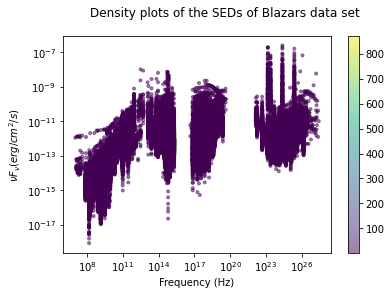

In [38]:
#plot of SED Builder data
sedColormapPlot(seddata_all_bl,True)

In [ ]:
#Plot of SED Builder Data
sedColormapPlot(seddata_all_agn, False)

In [39]:
# Hist2D of the SEDs in our blazars data set
# freq_all e flux_all sono array con tutte le coppie di dati del dataset anche ripetute
def hist2dSed(freq_all,flux_all,mode):
    '''Hist2D of the SEDs of the entire data set.
    ------------
            freq_all,flux_all = 1D-array with all couple of data of type Blazar or AGNs
            mode = boolean, 'True' for Blazars data and 'False' for AGNs data
    '''
    plt.figure()
    if mode:
        plt.title('2D Histogram of the SEDs of Blazars data set')
    else:
        plt.title('2D Histogram of the SEDs of AGNs data set')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel(r'$\nu F_{\nu} (erg/cm^2/s)$')
    plt.grid(False)

    plt.xscale('log')
    plt.yscale('log')

    x_bins = np.logspace(6, 27,200)
    y_bins = np.logspace(-20,-7,200)
    #plt.hist2d(freq_all,flux_all, bins=[x_bins,y_bins], vmin =10, cmap = 'BuPu')
    plt.hist2d(freq_all,flux_all, bins=[x_bins,y_bins], vmin =-10, cmap = 'twilight')
    cb = plt.colorbar()
    cb.set_label('counts in bin')
    plt.show()

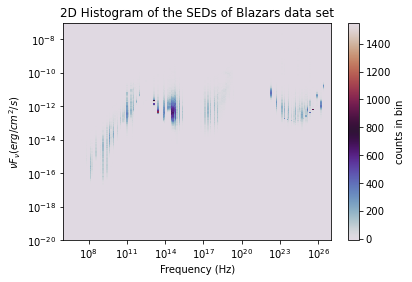

In [40]:
hist2dSed(freq_all_bl,flux_all_bl,True)

In [ ]:
hist2dSed(freq_all_agn,flux_all_agn,False)

# Nuova analisi con le Blazar dal VOUB

In [ ]:
# Modifiche per il mio dataset: 5603 frequenze diverse! Come gestirle?

In [ ]:
# Genero 'nn_freq_data' un vettore ordinato che contenga tutti i valori di frequenze diverse che compaiono nei due
# data set blazars e agns per creare gli array di lunghezza identica da dare in pasto alla rete neurale
tot_freq = freq_points_bl_ord
tot_freq_un = np.unique(tot_freq)
nn_freq_data = tot_freq_un[tot_freq_un.argsort()]

nn_freq_data.shape

In [ ]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(nn_freq_data,nn_freq_data)

In [ ]:
print('Min freq of dataset ', nn_freq_data.min())
print('Max freq of dataset ', nn_freq_data.max())

In [ ]:
bl_data_voub = GenerateDataSet(nn_freq_data, seddata_all_bl)

bl_data_voub.shape

In [ ]:
#plot of VOUB data
histData(point_sed_bl,point_sed_bl)

# Idee per migliorare risultati

In [ ]:
# binnare veramente: ho 5603 freq diverse creo la metà dei bin

minf = nn_freq_data.min()
maxf = nn_freq_data.max()
bins = np.logspace(7, 28, 2802)
digitized = np.digitize(nn_freq_data, bins)

In [ ]:
def rebin(arr, new_shape):
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
             new_shape[1], arr.shape[1] // new_shape[1])
    return arr.reshape(shape).mean(-1).mean(1)

In [ ]:
a= np.linspace(1,100,100)

In [ ]:
shape = (25, a.shape[0]//25)

In [ ]:
b=a.reshape(shape).mean(-1)
b

In [ ]:
shape=(50,2)
b=a.reshape(shape)
b